# Pipeline steps test

In [1]:
import numpy as np
from caits.filtering import filter_butterworth
from caits.fe import mean_value, std_value, stft, melspectrogram, istft
from caits.dataset._dataset3 import CaitsArray, DatasetList
from caits.transformers._func_transformer_v2 import FunctionTransformer
from caits.transformers._feature_extractor_v2 import FeatureExtractor
from caits.transformers._func_transformer_2d_v2 import FunctionTransformer2D
from caits.transformers._feature_extractor_2d_v2 import FeatureExtractor2D
from sklearn.preprocessing import StandardScaler

# Dataset

In [2]:
from caits.loading import csv_loader

data = csv_loader("data/GestureSet_small")


Loading CSV files: 100%|██████████| 924/924 [00:00<00:00, 1364.75it/s]


In [3]:
X, y, id = data["X"], data["y"], data["id"]
caitsX = [CaitsArray(values=x.values, axis_names={
    "axis_1": {
        col: i for i, col in enumerate(x.columns)
    }
}) for x in X]
type(caitsX[0]), type(y[0]), type(id[0])


(caits.dataset._dataset3.CaitsArray, str, str)

In [4]:
datasetListObj = DatasetList(caitsX, y, id)
datasetListObj

DatasetList object with 924 instances.

In [5]:
functionTransformer = FunctionTransformer(filter_butterworth, fs=200, filter_type='highpass', cutoff_freq=50)
transformedList = functionTransformer.fit_transform(datasetListObj)
transformedList

DatasetList object with 924 instances.

In [6]:
datasetListObj.X[0].values

array([[ 6.50000e-01,  2.27000e-01,  7.65000e-01, -4.82930e+01,
        -1.87800e+01, -1.81710e+01],
       [ 8.50000e-01,  1.75000e-01,  6.49000e-01, -5.06100e+01,
         1.28050e+01, -2.71340e+01],
       [ 9.80000e-01,  1.34000e-01,  5.07000e-01, -5.22560e+01,
         3.03660e+01, -3.03660e+01],
       ...,
       [ 1.34100e+00, -1.83000e-01,  3.20000e-02,  5.49000e-01,
        -3.39630e+01, -3.05490e+01],
       [ 1.69500e+00, -3.54000e-01,  6.90000e-02, -2.88410e+01,
        -1.09760e+01, -8.88410e+01],
       [ 1.96800e+00, -3.08000e-01,  3.09000e-01, -4.33540e+01,
         1.93900e+01, -1.17683e+02]])

In [7]:
transformedList.X[0].values

array([[ 2.01555385e-05,  4.32099118e-06,  7.11347027e-06,
        -4.32463718e-04, -5.96120657e-03, -1.31044886e-03],
       [ 1.41800834e-02,  8.64089925e-04,  8.72897031e-03,
        -3.88726942e-01, -1.54454591e-01,  4.51242898e-03],
       [-1.36048209e-02,  1.62356842e-03, -8.33764285e-03,
        -6.80272611e-03,  6.18062545e-01, -2.07246745e-01],
       ...,
       [-9.72889942e-03,  2.07514164e-02, -2.18143296e-03,
        -8.10518638e-01,  1.48724628e+00, -7.39856030e-02],
       [-2.62527203e-02, -4.09239682e-02, -2.93344000e-02,
         4.44577212e-01, -3.51790482e+00, -4.66535169e+00],
       [ 2.16568743e-04,  1.67545724e-04,  1.62162569e-04,
        -9.33721270e-03,  1.17002559e-02,  4.51638577e-03]])

In [8]:
featureExtractor = FeatureExtractor([
    {
        "func": mean_value,
        "params": {}
    },
    {
        "func": std_value,
        "params": {
            "ddof": 0
        }
    }
])


In [10]:
tmp = featureExtractor.fit_transform(datasetListObj)
tmp

DatasetList object with 924 instances.

In [11]:
tmpToDataset = datasetListObj.dict_to_dataset(tmp)

AttributeError: 'DatasetList' object has no attribute 'keys'

In [12]:
tmpToDataset[0]

NameError: name 'tmpToDataset' is not defined

In [13]:
featureExtractor2D = FeatureExtractor2D(melspectrogram, n_fft=10, hop_length=10)
tmp = featureExtractor2D.fit_transform(datasetListObj)

/home/kirk/PycharmProjects/crossai-ts/caits/fe/_spectrum.py:127: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = mel_filter(sr=sr, n_fft=n_fft, **kwargs)


In [14]:
tmp

DatasetList object with 924 instances.

In [15]:
featureExtractor2D = FeatureExtractor2D(stft, n_fft=10, hop_length=10)
tmp = featureExtractor2D.fit_transform(datasetListObj)

In [16]:
tmp.X[900].values.shape

(6, 6, 7)

In [17]:
functionTransformer = FunctionTransformer2D(istft, hop_length=10)
tmp = functionTransformer.fit_transform(tmp)

In [18]:
tmp.X[100].shape, datasetListObj.X[100].shape

((140, 6), (142, 6))

In [19]:
from caits.transformers._sliding_window_v2 import SlidingWindow

slidingWindow = SlidingWindow(window_size=10, overlap=5)
tmp = slidingWindow.fit_transform(datasetListObj)

In [20]:
len(tmp.X), len(tmp.y), len(tmp._id)

(25223, 25223, 25223)

In [21]:
tmp.to_numpy()

([array([[ 6.50000e-01,  2.27000e-01,  7.65000e-01, -4.82930e+01,
          -1.87800e+01, -1.81710e+01],
         [ 8.50000e-01,  1.75000e-01,  6.49000e-01, -5.06100e+01,
           1.28050e+01, -2.71340e+01],
         [ 9.80000e-01,  1.34000e-01,  5.07000e-01, -5.22560e+01,
           3.03660e+01, -3.03660e+01],
         [ 1.11800e+00,  1.01000e-01,  4.06000e-01, -5.32930e+01,
           2.58540e+01, -2.50000e+01],
         [ 1.24300e+00,  9.00000e-02,  3.56000e-01, -5.46950e+01,
           6.22000e+00, -1.42680e+01],
         [ 1.29700e+00,  8.40000e-02,  3.71000e-01, -5.16460e+01,
          -2.11590e+01,  9.15000e-01],
         [ 1.31500e+00,  6.50000e-02,  4.77000e-01, -4.70120e+01,
          -5.34760e+01,  1.84150e+01],
         [ 1.31200e+00,  8.30000e-02,  6.12000e-01, -4.16460e+01,
          -8.26220e+01,  3.62200e+01],
         [ 1.16700e+00,  1.01000e-01,  7.11000e-01, -3.60980e+01,
          -9.99390e+01,  5.10980e+01],
         [ 1.06300e+00,  1.03000e-01,  7.08000e-01, -2.

In [22]:
tmp_flat = tmp.flatten()
tmp_flat

DatasetList object with 25223 instances.

In [23]:
from caits.transformers._data_converters_v2 import DatasetToArray

dataFlatten = DatasetToArray(flatten=True, dtype=np.float64)

dataFlatten.fit(tmp)


DatasetToArray(dtype=<class 'numpy.float64'>, flatten=True)

In [24]:
tmp_conv = dataFlatten.transform(tmp)
tmp_conv

DatasetList object with 25223 instances.

In [25]:
tmp_conv.X

            0       1      2        3        4        5  \
    0    0.65   0.227  0.765  -48.293   -18.78  -18.171  
    1   1.297   0.084  0.371  -51.646  -21.159    0.915  
    2   1.003   0.145  0.685  -17.256  -99.207   60.549  
    3    0.22    0.27  0.234   -2.134   15.244    7.683  
    4   1.211  -0.034  0.565  -20.793  -61.585  -17.744  
  ...     ...     ...    ...      ...      ...      ...  
25218  -0.482  -0.773  0.492    -1.22  -37.012    4.817  
25219  -0.422  -0.764  0.415   -1.646  -41.951   12.073  
25220  -0.465  -0.777  0.471   -2.012  -42.378   14.817  
25221  -0.385  -0.728  0.515   -2.561   -33.11   26.098  
25222  -0.336  -0.667   0.62   -2.439  -37.683   54.817  

            6       7      8        9       10       11  \
    0    0.85   0.175  0.649   -50.61   12.805  -27.134  
    1   1.315   0.065  0.477  -47.012  -53.476   18.415  
    2   0.804   0.181  0.623   -9.024  -80.305   56.098  
    3   0.254   0.237  0.218   -4.756    0.671   -4.634  
    4    1.

In [26]:
from caits.transformers._sklearn_wrapper import SklearnWrapper
scaler = SklearnWrapper(StandardScaler)

tmp_flat_scaled = scaler.fit_transform(tmp_conv)

In [27]:
scaler.fitted_transformer_.mean_.shape, scaler.fitted_transformer_.var_.shape

((60,), (60,))

In [28]:
# tmp_flat_scaled.X[0].shape, len(tmp_flat_scaled.y), len(tmp_flat_scaled._id)
tmp_flat_scaled.X

                          0                     1                     2                      3                     4                     5  \
    0    0.9579952891487599   -0.4296959147990568    0.8311960675293498    -1.6293774259893985  -0.17884054824749038  -0.37450881718299317  
    1    1.8604920480664369   -0.6327993249567408  -0.02207282206154568     -1.744961598879451  -0.20194890567365328   0.11389415114692919  
    2    1.4503930571517583   -0.5461608073370294    0.6579435011149549    -0.5594740636307491   -0.9600662156346301    1.6399039286480603  
    3    0.3581906425728692  -0.36862286139499784   -0.3187678420461971  -0.038190478052648934   0.15165073088986458   0.28708451527020873  
    4    1.7405311187512589   -0.8003951459260187    0.3980646514933621    -0.6814010602045978   -0.5946258528405565  -0.36358206105405694  
  ...                   ...                   ...                   ...                    ...                   ...                   ...  
25218    -0.

In [29]:
from caits.transformers._data_converters_v2 import ArrayToDataset

shape = tmp.X[0].shape

dataInverseFlatten = ArrayToDataset(
    shape=shape,
    dtype=np.float64,
    axis_names={"axis_1": tmp.X[0].axis_names["axis_1"]}
)

dataInverseFlatten.fit(tmp_flat_scaled)

tmp_conv_inv = dataInverseFlatten.transform(tmp_flat_scaled)



In [30]:
tmp_conv_inv.X[0]

         acc_x_axis_g         acc_y_axis_g           acc_z_axis_g     gyr_x_axis_deg/s      gyr_y_axis_deg/s      gyr_z_axis_deg/s  
0  0.9579952891487599  -0.4296959147990568     0.8311960675293498  -1.6293774259893985  -0.17884054824749038  -0.37450881718299317  
1  1.2398845144685648  -0.5026567961985033     0.5827143249476336   -1.707454017653691   0.13050970081459243   -0.5999962379612934  
2  1.4260075990471948  -0.5602352061504804     0.2748709607266363   -1.762053581463199   0.30344797646419186   -0.6785009129254501  
3  1.6223694413335503   -0.607248616094896    0.05589989240862817  -1.7901961823373735    0.2615921307569602   -0.5364522868928431  
4  1.7984332367864762  -0.6236748886062441   -0.05202080207197799  -1.8368770201520104   0.07287951610133946   -0.2583745541173984  
5  1.8733050896707304  -0.6316519023187789  -0.019120146598946206  -1.7349921454999615  -0.19062235962407878    0.1323620968073715  
6  1.9007851923676502  -0.6564646749795784    0.21173897688556237  -1

In [31]:
tmp_train, tmp_test, = tmp.train_test_split(random_state=42)
tmp_train, tmp_test, type(tmp_train.X[0]), type(tmp_test.X[0])

(DatasetList object with 20178 instances.,
 DatasetList object with 5045 instances.,
 caits.dataset._dataset3.CaitsArray,
 caits.dataset._dataset3.CaitsArray)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler

pipeline = Pipeline(
    [
        ("conv", dataFlatten),
        ("scaler", scaler),
        ("conv_inv", dataInverseFlatten),
    ]
)

In [33]:
pipeline.fit(tmp_train)

Pipeline(steps=[('conv',
                 DatasetToArray(dtype=<class 'numpy.float64'>, flatten=True)),
                ('scaler',
                 SklearnWrapper(transformer=<class 'sklearn.preprocessing._data.StandardScaler'>,
                                transformer_kwargs={})),
                ('conv_inv',
                 ArrayToDataset(axis_names={'axis_1': {'acc_x_axis_g': 0,
                                                       'acc_y_axis_g': 1,
                                                       'acc_z_axis_g': 2,
                                                       'gyr_x_axis_deg/s': 3,
                                                       'gyr_y_axis_deg/s': 4,
                                                       'gyr_z_axis_deg/s': 5}},
                                axis_names_={'axis_1': {'acc_x_axis_g': 0,
                                                        'acc_y_axis_g': 1,
                                                        'acc_z_axis_g': 2,
                                                        'gyr_x_axis_deg/s': 3,
                                                        'gyr_y_axis_deg/s': 4,
                                                        'gyr_z_axis_deg/s': 5}},
                                dtype=<class 'numpy.float64'>,
                                dtype_=<class 'numpy.float64'>, shape=(10, 6),
                                shape_=(10, 6)))])

In [34]:
pipeline.named_steps["scaler"].fitted_transformer_.mean_

array([-0.03527817,  0.5280725 ,  0.38032635, -0.97728898, -0.57514625,
       -3.45386956, -0.03547145,  0.52826797,  0.37967876, -0.90655278,
       -0.80213901, -3.65123759, -0.0363034 ,  0.52814199,  0.37965467,
       -0.83668669, -1.06183323, -3.82393736, -0.03646556,  0.52792636,
        0.38012345, -0.79006413, -1.23157171, -3.95490237, -0.03666017,
        0.52826955,  0.38097725, -0.72855977, -1.29181361, -4.04847349,
       -0.03721023,  0.5281517 ,  0.38120954, -0.64606358, -1.36416548,
       -4.16357042, -0.03811156,  0.52771122,  0.38073159, -0.6126122 ,
       -1.54238765, -4.30362405, -0.03959054,  0.52734166,  0.38045911,
       -0.6294719 , -1.73990445, -4.42406135, -0.03970354,  0.52673471,
        0.3802586 , -0.68320433, -1.84099737, -4.51443652, -0.03910482,
        0.52676896,  0.37993701, -0.7049997 , -1.84412752, -4.61656368])

In [35]:
transformed_data_train = pipeline.fit_transform(tmp_train)
transformed_data_test = pipeline.transform(tmp_test)

In [36]:
transformed_data_train, transformed_data_test

(DatasetList object with 20178 instances.,
 DatasetList object with 5045 instances.)

In [37]:
transformed_data_train.X[0].shape, transformed_data_test.X[0].shape

((10, 6), (10, 6))

In [38]:
len(transformed_data_train.y), len(transformed_data_test.y)

(20178, 5045)

In [39]:
print(pipeline.named_steps['scaler'].fitted_transformer_.mean_.shape)
print(pipeline.named_steps['scaler'].fitted_transformer_.var_.shape)


(60,)
(60,)


In [40]:
tmp_train_flat = dataFlatten.fit_transform(tmp_train)
tmp_train_flat

DatasetList object with 20178 instances.

In [41]:
final_train = pipeline.transform(tmp_train)
final_test = pipeline.transform(tmp_test)

final_train, final_test


(DatasetList object with 20178 instances.,
 DatasetList object with 5045 instances.)

In [42]:
tmp_train.X[0]

   acc_x_axis_g  acc_y_axis_g  acc_z_axis_g  gyr_x_axis_deg/s  gyr_y_axis_deg/s  gyr_z_axis_deg/s  
0        -0.039         0.862          0.43             1.707            69.878            -6.037  
1        -0.013          0.86         0.419             -0.61            64.939            -6.524  
2         0.039         0.864         0.327            -2.744            52.805            -7.439  
3         0.033         0.859         0.251            -3.598            41.585            -8.476  
4        -0.056         0.832          0.25            -2.073            36.707            -8.659  
5        -0.177           0.8         0.292             1.341            37.256            -8.049  
6        -0.215         0.766         0.341             6.768             40.61            -8.841  
7        -0.163         0.733         0.371            12.073            42.378           -12.561  
8        -0.089         0.699          0.35            16.037            39.207           -16.463  


In [43]:
final_train.X[0]

            acc_x_axis_g         acc_y_axis_g           acc_z_axis_g      gyr_x_axis_deg/s     gyr_y_axis_deg/s      gyr_z_axis_deg/s  
0  -0.005185043671110938  0.47047678561463224      0.107361385865385   0.09419640460052082   0.6789043966361139  -0.06607574186439628  
1    0.03136755680867366   0.4657508553331304    0.08520786143273344   0.01039614349170052   0.6330440864555087  -0.07356233897992263  
2    0.10521152625794285   0.4708818475717814   -0.11421732775296636  -0.06684392230530857   0.5184193087065799  -0.09270558758685248  
3    0.09721259570442967  0.46481705157616815    -0.2803700004386542  -0.09801507418952567   0.4119038974720174  -0.11606514971291729  
4  -0.027075905891452305  0.42700603093708733   -0.28477361399555984  -0.04688163610629338   0.3656852875943915  -0.11837546393124113  
5   -0.19531169020043068  0.38238943091658417   -0.19468572643218332   0.06925496844483049   0.3719099481946017  -0.09961326680572177  
6   -0.24732483979205652   0.3346718845782153   

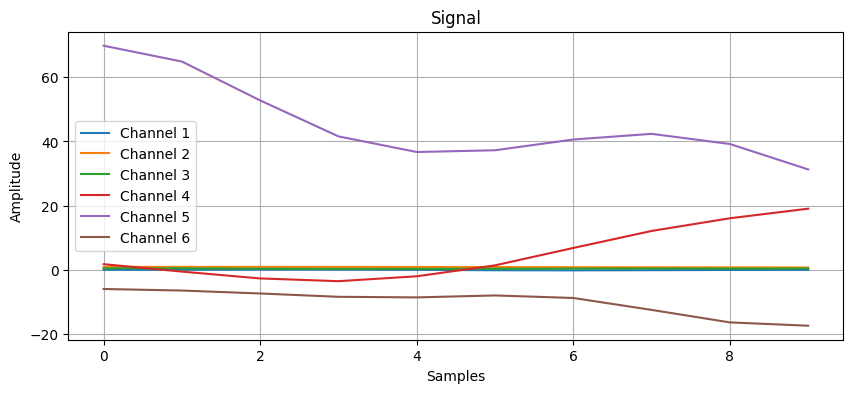

In [44]:
from caits.visualization import plot_signal

plot_signal(tmp_train.X[0].values, return_mode=False)

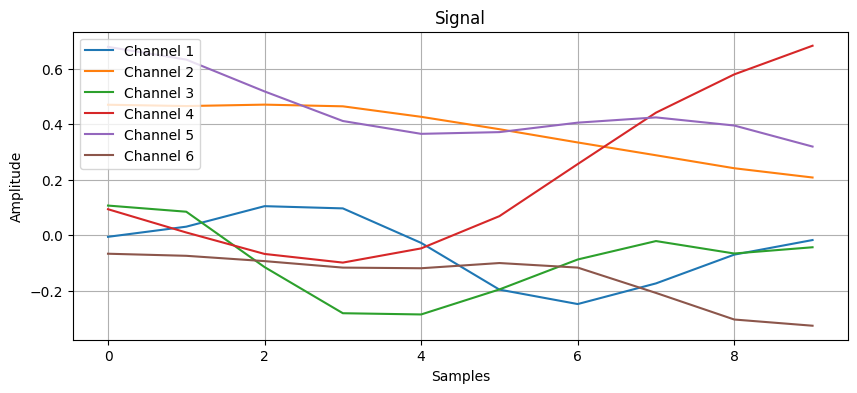

In [45]:
plot_signal(final_train.X[0].values, return_mode=False)


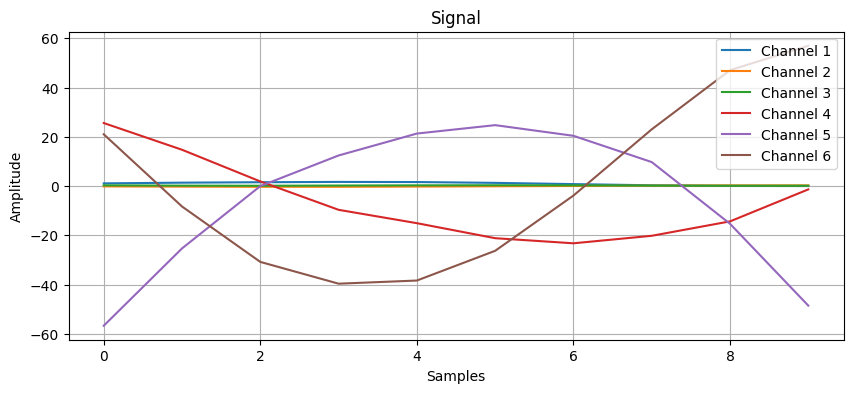

In [46]:
plot_signal(tmp_test.X[0].values, return_mode=False)


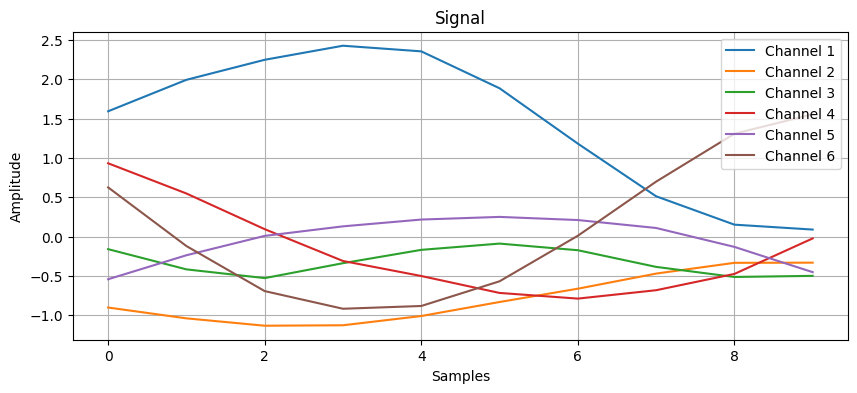

In [47]:
plot_signal(final_test.X[0].values, return_mode=False)


In [48]:
from sklearn.decomposition import PCA

pipeline2 = Pipeline(
    [
        ("conv", dataFlatten),
        ("scaler", SklearnWrapper(StandardScaler)),
        ("pca", SklearnWrapper(PCA, {"n_components": 2})),
    ]
)

tmp_pca_train = pipeline2.fit_transform(tmp_train)
tmp_pca_test = pipeline2.transform(tmp_test)

In [49]:
tmp_pca_train, tmp_pca_test, tmp_pca_train.X.shape, tmp_pca_test.X.shape

(DatasetList object with 20178 instances.,
 DatasetList object with 5045 instances.,
 (20178, 2),
 (5045, 2))

In [50]:
def plot_scatter_pca(
        arr: np.ndarray,
        c_name: str="y",
        cmap_set: str = "plasma"

):
    import matplotlib.pyplot as plt

    if arr.ndim == 2:
        plt.style.use('classic')
        plt.figure(figsize=(16, 8))
        plt.scatter(arr[:, 0], arr[:, 1], c=c_name, cmap=cmap_set)
        plt.xlabel('First principal component')
        plt.ylabel('Second Principal Component')

    elif arr.ndim == 3:
        plt.style.use('classic')
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(arr[:, 0], arr[:, 1], arr[:, 2], c=c_name, cmap=cmap_set)
        ax.set_xlabel('First principal component')
        ax.set_ylabel('Second Principal Component')
        ax.set_zlabel('Third Principal Component')

    else:
        print("The DataFrame has more than 4 columns.")


/tmp/ipykernel_12317/927769962.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(arr[:, 0], arr[:, 1], c=c_name, cmap=cmap_set)


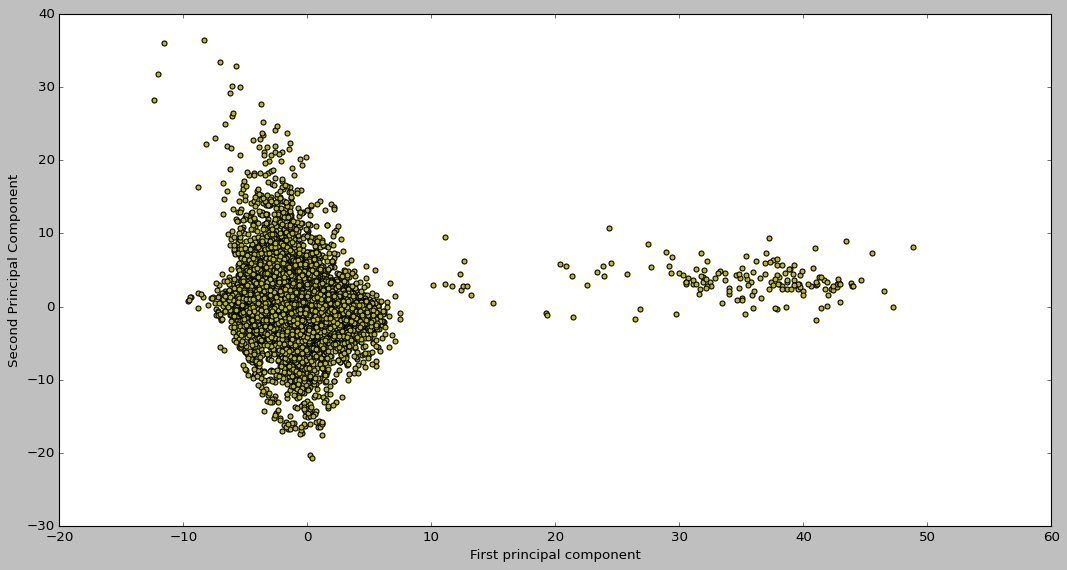

In [51]:
plot_scatter_pca(tmp_pca_train.X.values, cmap_set="viridis")

/tmp/ipykernel_12317/927769962.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(arr[:, 0], arr[:, 1], c=c_name, cmap=cmap_set)


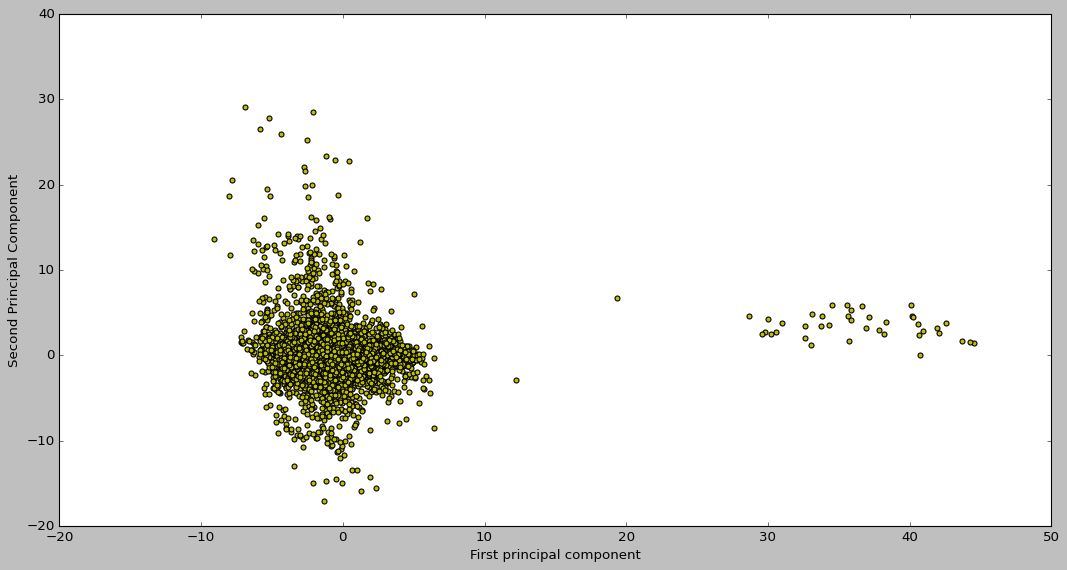

In [52]:
plot_scatter_pca(tmp_pca_test.X.values, cmap_set="viridis")

In [53]:
from caits.transformers._feature_extractor_v2 import FeatureExtractor
from caits.properties import magnitude_signal, sma_signal

mag_fe = FeatureExtractor(
    [
        {
            "func": magnitude_signal,
            "params": {
            }
        },
    ],
    axis=1,
    to_dataset=True
)

tmp_mag = mag_fe.fit_transform(datasetListObj)
tmp_mag

DatasetList object with 924 instances.

In [54]:
tmp_mag.X[0]

       magnitude_signal  
  0   54.91945688005299  
  1   58.84529213964359  
  2   67.64697223823103  
  3   64.30395109167088  
  4   56.88134258260788  
...                 ...  
204  122.11964154058101  
205   77.07662900646343  
206  45.704058517816556  
207   94.06382003724917  
208  126.92081497532232  

CaitsArray with shape (209, 1)

In [55]:
from caits.transformers._augment_singal import AugmentSignal
from caits.augmentation import add_noise_ts, time_warp_ts

augmentation_transformer = AugmentSignal(
    [
        {
            "func": time_warp_ts,
            "params": {
                "n_speed_change": 4
            }
        },
        {
            "func": add_noise_ts,
            "params": {
                "loc": 0,
                "scale": 1,
            }
        }
    ],
    repeats=2
)

In [56]:
augmented_tmp_train = augmentation_transformer.fit_transform(tmp_train)

In [57]:
tmp_train, augmented_tmp_train

(DatasetList object with 20178 instances.,
 DatasetList object with 60534 instances.)

In [58]:
len(tmp_train.X), len(tmp_train.y), len(tmp_train._id)

(20178, 20178, 20178)

In [59]:
len(augmented_tmp_train.X), len(augmented_tmp_train.y), len(augmented_tmp_train._id)

(60534, 60534, 60534)

In [60]:
tmp_train.X[0], augmented_tmp_train.X[0]

(   acc_x_axis_g  acc_y_axis_g  acc_z_axis_g  gyr_x_axis_deg/s  gyr_y_axis_deg/s  gyr_z_axis_deg/s  
 0        -0.039         0.862          0.43             1.707            69.878            -6.037  
 1        -0.013          0.86         0.419             -0.61            64.939            -6.524  
 2         0.039         0.864         0.327            -2.744            52.805            -7.439  
 3         0.033         0.859         0.251            -3.598            41.585            -8.476  
 4        -0.056         0.832          0.25            -2.073            36.707            -8.659  
 5        -0.177           0.8         0.292             1.341            37.256            -8.049  
 6        -0.215         0.766         0.341             6.768             40.61            -8.841  
 7        -0.163         0.733         0.371            12.073            42.378           -12.561  
 8        -0.089         0.699          0.35            16.037            39.207           

In [61]:
augmented_tmp_train.X[0], augmented_tmp_train.X[20178]

(   acc_x_axis_g  acc_y_axis_g  acc_z_axis_g  gyr_x_axis_deg/s  gyr_y_axis_deg/s  gyr_z_axis_deg/s  
 0        -0.039         0.862          0.43             1.707            69.878            -6.037  
 1        -0.013          0.86         0.419             -0.61            64.939            -6.524  
 2         0.039         0.864         0.327            -2.744            52.805            -7.439  
 3         0.033         0.859         0.251            -3.598            41.585            -8.476  
 4        -0.056         0.832          0.25            -2.073            36.707            -8.659  
 5        -0.177           0.8         0.292             1.341            37.256            -8.049  
 6        -0.215         0.766         0.341             6.768             40.61            -8.841  
 7        -0.163         0.733         0.371            12.073            42.378           -12.561  
 8        -0.089         0.699          0.35            16.037            39.207           

In [62]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

# kwargs_dict = {
#     "output_distribution": "uniform",
#     "n_quantiles": 100
# }

pipe_sklearn = Pipeline(
    [
        ("flatten", dataFlatten),
        ("scaler", SklearnWrapper(MinMaxScaler)),
        ("quantile", SklearnWrapper(QuantileTransformer, {"output_distribution": "uniform", "n_quantiles": 100})),
        # ("quantile", SklearnWrapper(QuantileTransformer, **kwargs_dict)),
        # ("pca", SklearnWrapper(PCA, n_components=2)),
        ("unflatten", dataInverseFlatten)
    ]
)

In [63]:
train = pipe_sklearn.fit_transform(tmp_train)
test = pipe_sklearn.transform(tmp_test)

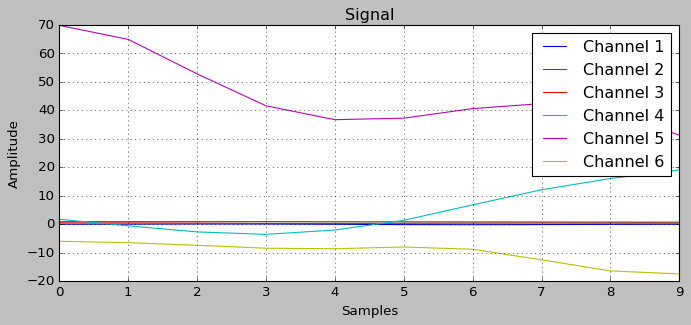

In [64]:
plot_signal(tmp_train.X[0].values, return_mode=False)

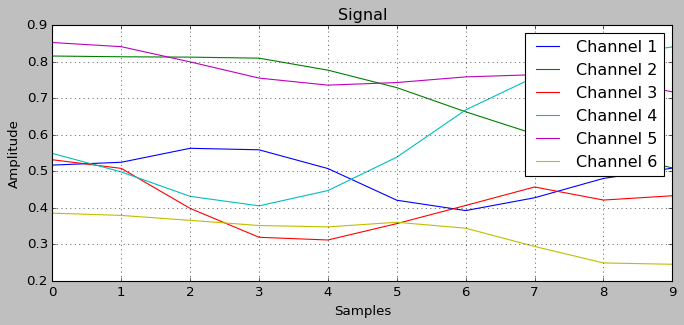

In [65]:
plot_signal(train.X[0].values, return_mode=False)

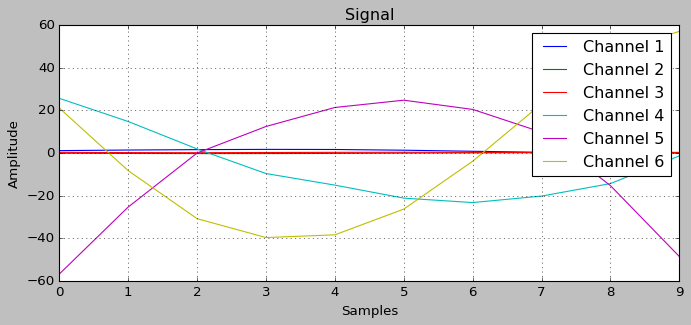

In [66]:
plot_signal(tmp_test.X[0].values, return_mode=False)

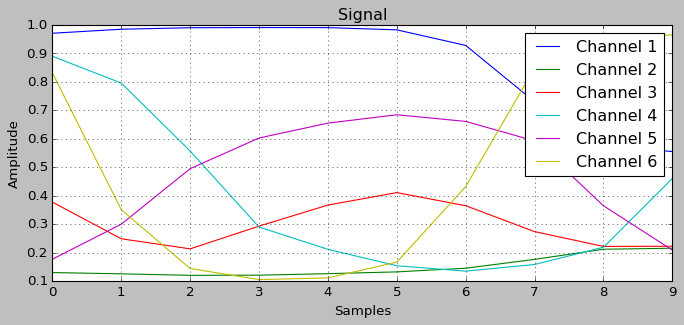

In [67]:
plot_signal(test.X[0].values, return_mode=False)

In [68]:
shuffled_dataset = datasetListObj.shuffle()

In [69]:
datasetListObj.X, datasetListObj

([     acc_x_axis_g  acc_y_axis_g  acc_z_axis_g  gyr_x_axis_deg/s  gyr_y_axis_deg/s  gyr_z_axis_deg/s  
    0          0.65         0.227         0.765           -48.293            -18.78           -18.171  
    1          0.85         0.175         0.649            -50.61            12.805           -27.134  
    2          0.98         0.134         0.507           -52.256            30.366           -30.366  
    3         1.118         0.101         0.406           -53.293            25.854             -25.0  
    4         1.243          0.09         0.356           -54.695              6.22           -14.268  
  ...           ...           ...           ...               ...               ...               ...  
  204          0.34         0.076         0.077            63.232           -70.061              77.5  
  205         0.917        -0.003         0.094            40.122           -54.939             36.22  
  206         1.341        -0.183         0.032             0.54

In [70]:
datasetListObj.y

['03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',
 '03a',


In [71]:
shuffled_dataset.X, shuffled_dataset

([    acc_x_axis_g  acc_y_axis_g  acc_z_axis_g  gyr_x_axis_deg/s  gyr_y_axis_deg/s  gyr_z_axis_deg/s  
   0        -0.673         0.651         0.405           -12.134           -18.598            -5.366  
   1        -0.634         0.718         0.303           -18.171           -20.305            -2.439  
   2        -0.604         0.763         0.254            -23.11           -25.427             0.305  
   3        -0.628         0.767         0.225           -24.878            -33.11             1.768  
   4        -0.644         0.758         0.259            -23.72            -36.22             1.524  
  ...           ...           ...           ...               ...               ...               ...  
  85        -0.382         0.722         0.483             1.463          -216.585             8.963  
  86        -0.374         0.704         0.524             0.488          -213.537             1.646  
  87        -0.281         0.713         0.625             2.256        

In [72]:
shuffled_dataset.y

['02a',
 '01e',
 '03a',
 '01e',
 '02a',
 '03a',
 '03a',
 '03a',
 '01d',
 '01e',
 '03a',
 '01d',
 '02a',
 '01d',
 '03a',
 '03a',
 '01d',
 '03a',
 '01e',
 '03a',
 '01e',
 '02a',
 '01e',
 '02a',
 '02a',
 '03a',
 '02a',
 '01d',
 '01e',
 '01e',
 '01e',
 '02a',
 '03a',
 '01d',
 '01e',
 '01d',
 '03a',
 '02a',
 '01e',
 '03a',
 '01e',
 '01d',
 '01d',
 '02a',
 '01d',
 '01d',
 '03a',
 '01e',
 '03a',
 '01d',
 '03a',
 '02a',
 '01e',
 '01e',
 '02a',
 '01d',
 '01e',
 '01e',
 '01d',
 '03a',
 '03a',
 '01e',
 '02a',
 '01d',
 '03a',
 '01d',
 '01d',
 '01e',
 '01e',
 '03a',
 '03a',
 '01d',
 '03a',
 '01d',
 '01e',
 '03a',
 '01e',
 '02a',
 '01e',
 '01e',
 '03a',
 '01d',
 '01e',
 '01e',
 '03a',
 '01d',
 '01e',
 '02a',
 '01d',
 '03a',
 '01e',
 '01e',
 '02a',
 '01e',
 '03a',
 '02a',
 '03a',
 '02a',
 '01e',
 '01e',
 '01d',
 '01d',
 '03a',
 '01e',
 '01e',
 '01e',
 '02a',
 '03a',
 '02a',
 '01d',
 '01e',
 '03a',
 '01d',
 '01d',
 '01e',
 '01e',
 '01d',
 '01e',
 '02a',
 '01d',
 '01d',
 '01d',
 '01d',
 '01d',
 '01d',
